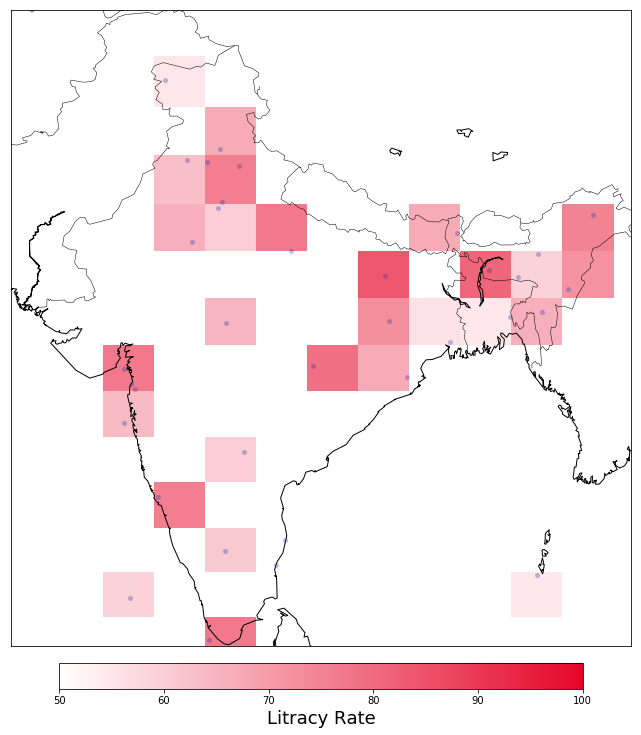

In [3]:

import csv
import numpy as np
from mpl_toolkits.basemap import Basemap
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

#reading data from csv and finding litaracy rate
df=pd.read_csv('india-districts-census-2011.csv')
df1= df[['State name', 'Population', 'Literate']]
df_states = df1.groupby(['State name'], as_index=False)[["Population", "Literate"]].sum()
lit_avg = pd.Series(df_states['Literate']/df_states['Population']*100)
df_states = df_states.assign(lit_avg=lit_avg.values)

# india states are drwan by basemap. So latitude and lngitudes of all states
l = [11.4,17.22, 28.1,26.38, 25.37,30.45,21.25,20.18,20.42,15.11,21.1,28.45,31.06,34.05,23.34,12.58,8.29,10.32,23.25,
     18.59,24.78,25.34,23.72,25.65,28.68,20.76,11.91,30.55,26.91,27.33,13.08,23.5,26.51,30.31,22.34]
n = [92.46,78.29,95.14,92.48,85.09,76.47,81.62,73.01,72.83,74.12,72.5,77.02,77.1,74.47,85.3,77.34,
76.57,72.78,77.41,72.5,93.96,91.53,92.71,90.1,77.22,86.17,79.81,75.51,75.78,88.6,80.27,91.16,80.57,78.03,88.22]
lats, lons = l, n

#Base map
m =Basemap(projection='mill',
            llcrnrlat=8,
            llcrnrlon=67,
            urcrnrlat=37,
            urcrnrlon=97,
             resolution='l')
m.drawcoastlines()
m.drawcountries()
m.drawstates()
 

    
# ######################################################################
# bin the epicenters (adapted from 
# http://stackoverflow.com/questions/11507575/basemap-and-density-plots)

# compute appropriate bins to chop up the data:
db = 1 # bin padding
lon_bins = np.linspace(min(lons)-db, max(lons)+db, 10+1) # 10 bins
lat_bins = np.linspace(min(lats)-db, max(lats)+db, 13+1) # 13 bins
    
density, _, _ = np.histogram2d(lats, lons, [lat_bins, lon_bins])

# assigning bins to actual iteracy data
i= 0
for row in range(len(density)):
    for col in range(len(density[row])):
        if density[row][col] >0:
            density[row][col] = int(df_states['lit_avg'][i])
            i += 1


# Turn the lon/lat of the bins into 2 dimensional arrays ready
# for conversion into projected coordinates
lon_bins_2d, lat_bins_2d = np.meshgrid(lon_bins, lat_bins)

# convert the bin mesh to map coordinates:
xs, ys = m(lon_bins_2d, lat_bins_2d) # will be plotted using pcolormesh
# ######################################################################

# nnp=np.array(df_states['lit_avg'])
# nnp.shape= (7,5)
# nnp

# define custom colormap, white -> nicered, #E6072A = RGB(0.9,0.03,0.16)
cdict = {'red':  ( (0.0,  1.0,  1.0),
                   (1.0,  0.9,  1.0) ),
         'green':( (0.0,  1.0,  1.0),
                   (1.0,  0.03, 0.0) ),
         'blue': ( (0.0,  1.0,  1.0),
                   (1.0,  0.16, 0.0) ) }
custom_map = LinearSegmentedColormap('custom_map', cdict)
plt.register_cmap(cmap=custom_map)


# add histogram squares and a corresponding colorbar to the map:
plt.pcolormesh(xs, ys, density, cmap="custom_map")

cbar = plt.colorbar(orientation='horizontal', shrink=0.625, aspect=20, fraction=0.2,pad=0.02)
cbar.set_label('Litracy Rate',size=18)
plt.clim([50,100])


# translucent blue scatter plot of epicenters above histogram:    
x,y = m(lons, lats)
m.plot(x, y, 'o', markersize=5,zorder=6, markerfacecolor='#1b2fad',markeredgecolor="none", alpha=0.3)
 
    
# http://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap.drawmapscale
# m.drawmapscale(-119-6, 37-7.2, -119-6, 37-7.2, 500, barstyle='fancy', yoffset=20000)
    
    
# make image bigger:
plt.gcf().set_size_inches(15,15)

plt.show()